In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('adult.csv')

# Display the first few rows of the dataset
print(data.head())


   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Prepare the data
X = data.drop('income', axis=1) 
y = data['income']

# Encode categorical variables
X = pd.get_dummies(X)

# Initialize the model
rf_classifier = RandomForestClassifier()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')


Cross-validation scores: [0.85187839 0.85075238 0.85186323 0.85339885 0.85821048]
Mean cross-validation score: 0.8532206668556345


In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the model with varying numbers of estimators and learning rates
n_estimators_list = [50, 100, 200]
learning_rates = [0.01, 0.1, 0.2]

for n_estimators in n_estimators_list:
    for lr in learning_rates:
        gbc = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=lr)
        gbc.fit(X_train, y_train)
        
        train_accuracy = accuracy_score(y_train, gbc.predict(X_train))
        test_accuracy = accuracy_score(y_test, gbc.predict(X_test))
        
        print(f'n_estimators: {n_estimators}, learning_rate: {lr}')
        print(f'Training accuracy: {train_accuracy}')
        print(f'Test accuracy: {test_accuracy}')
        print('-' * 30)


n_estimators: 50, learning_rate: 0.01
Training accuracy: 0.8035983927520283
Test accuracy: 0.8108301770907974
------------------------------
n_estimators: 50, learning_rate: 0.1
Training accuracy: 0.8608757965858778
Test accuracy: 0.8663118026410073
------------------------------
n_estimators: 50, learning_rate: 0.2
Training accuracy: 0.8686305121183426
Test accuracy: 0.8734773262360528
------------------------------
n_estimators: 100, learning_rate: 0.01
Training accuracy: 0.8442914544570419
Test accuracy: 0.8510594738458389
------------------------------
n_estimators: 100, learning_rate: 0.1
Training accuracy: 0.8680418703452512
Test accuracy: 0.874091513972771
------------------------------
n_estimators: 100, learning_rate: 0.2
Training accuracy: 0.8751823509840555
Test accuracy: 0.8776742757702938
------------------------------
n_estimators: 200, learning_rate: 0.01
Training accuracy: 0.8499219409822639
Test accuracy: 0.8547446002661481
------------------------------
n_estimators: 

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('adult.csv')

# Prepare the data
X = data.drop('income', axis=1)  # Replace 'income' with the actual name of the target column
y = data['income']

# Encode categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert target labels to binary
y_train = y_train.map({'<=50K': 0, '>50K': 1})
y_test = y_test.map({'<=50K': 0, '>50K': 1})

# Initialize the Random Forest model
rf_classifier = RandomForestClassifier()

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Precision: 0.7310173697270471
Recall: 0.643231441048035
F1-Score: 0.6843205574912893


Precision: 0.7286783042394015
Recall: 0.6379912663755458
F1-Score: 0.680325960419092


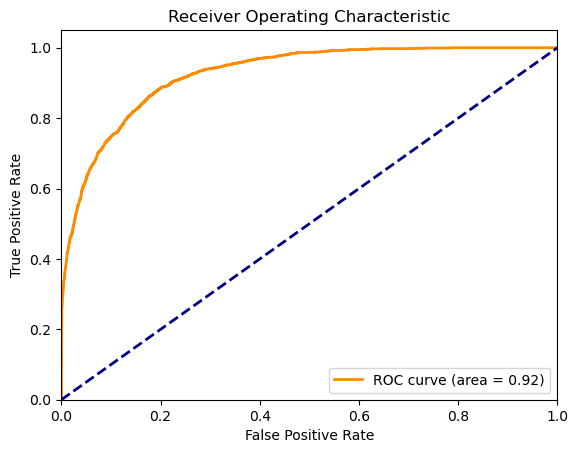

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

# Load the dataset
data = pd.read_csv('adult.csv')

# Prepare the data
X = data.drop('income', axis=1)  # Replace 'income' with the actual name of the target column
y = data['income']

# Encode categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert target labels to binary
y_train = y_train.map({'<=50K': 0, '>50K': 1})
y_test = y_test.map({'<=50K': 0, '>50K': 1})

# Initialize and train the Random Forest model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Initialize and train the Gradient Boosting model
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_proba = gbc.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Load the dataset
data = pd.read_csv('adult.csv')

# Prepare the data
X = data.drop('income', axis=1)  # Replace 'income' with the actual name of the target column
y = data['income']

# Encode categorical variables
X = pd.get_dummies(X)

# Convert target labels to binary
y = y.map({'<=50K': 0, '>50K': 1})

# Initialize the models
svm_classifier = SVC(probability=True)
rf_classifier = RandomForestClassifier()
gbc = GradientBoostingClassifier()

# List of models
models = [
    ('SVM', svm_classifier),
    ('Random Forest', rf_classifier),
    ('Gradient Boosting', gbc)
]

# Compare models using cross-validation
for name, model in models:
    accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=5, scoring='precision').mean()
    recall = cross_val_score(model, X, y, cv=5, scoring='recall').mean()
    f1 = cross_val_score(model, X, y, cv=5, scoring='f1').mean()
    roc_auc = cross_val_score(model, X, y, cv=5, scoring='roc_auc').mean()
    
    print(f'{name}:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print(f'ROC-AUC: {roc_auc}')
    print('-' * 30)
